In [35]:
import numpy as np
import pandas as pd

In [37]:
def transformar_sexo(valor):
    if valor =='female':
        return 1
    elif valor =='male':
        return 0


In [75]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train['Sex_bin'] = train['Sex'].map(transformar_sexo)
test['Sex_bin'] = test['Sex'].map(transformar_sexo)
variaveis = ['Sex_bin','Age']
X = train[variaveis].fillna(-1)
y = train['Survived'].fillna(-1)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [77]:
X_falso = np.arange(10)
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
np.random.seed(1)
train_test_split(X_falso, test_size=.5)

[array([3, 1, 7, 8, 5]), array([2, 9, 6, 4, 0])]

In [78]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [79]:
X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train, y_train, test_size=.5)

In [80]:
X_train_train.shape, X_valid.shape, y_train_train.shape, y_valid.shape

((222, 2), (223, 2), (222,), (223,))

In [82]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
modelo.fit(X_train_train, y_train_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [85]:
p = modelo.predict(X_valid)

In [87]:
np.mean(y_valid == p)

0.7713004484304933

In [88]:
p = (X_valid['Sex_bin'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.8161434977578476

# Validação cruzada

In [90]:
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [91]:
from sklearn.model_selection import KFold

In [102]:
kf = KFold(3, shuffle=True, random_state=1)

In [103]:
for linhas_train_train, linhas_valid in kf.split(X_falso):
    print("Treino: ", linhas_train_train)
    print("Valid: ", linhas_valid)
    print()

Treino:  [0 1 3 5 7 8]
Valid:  [2 4 6 9]

Treino:  [2 4 5 6 7 8 9]
Valid:  [0 1 3]

Treino:  [0 1 2 3 4 6 9]
Valid:  [5 7 8]



In [117]:
resultados = []
for rep in range(10):
    print("Rep: ", rep)
    kf = KFold(2, shuffle=True, random_state=rep)

    for linhas_train_train, linhas_valid in kf.split(X):

        print("Treino: ", linhas_train_train.shape[0])
        print("Valid: ", linhas_valid.shape[0])
        print()

        X_train_train, X_valid = X.iloc[linhas_train_train], X.iloc[linhas_valid]
        y_train_train, y_valid = y.iloc[linhas_train_train], y.iloc[linhas_valid]

        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
        modelo.fit(X_train_train, y_train_train)

        p = modelo.predict(X_valid)
        acc = np.mean(y_valid==p)
        resultados.append(acc)
        print("Acc: ", acc)
        print()
        #print(X_train_train.head())
        #print()

Rep:  0
Treino:  445
Valid:  446

Acc:  0.7645739910313901

Treino:  446
Valid:  445

Acc:  0.7752808988764045

Rep:  1
Treino:  445
Valid:  446

Acc:  0.7399103139013453

Treino:  446
Valid:  445

Acc:  0.7910112359550562

Rep:  2
Treino:  445
Valid:  446

Acc:  0.7802690582959642

Treino:  446
Valid:  445

Acc:  0.7887640449438202

Rep:  3
Treino:  445
Valid:  446

Acc:  0.7690582959641256

Treino:  446
Valid:  445

Acc:  0.7528089887640449

Rep:  4
Treino:  445
Valid:  446

Acc:  0.7488789237668162

Treino:  446
Valid:  445

Acc:  0.7460674157303371

Rep:  5
Treino:  445
Valid:  446

Acc:  0.7354260089686099

Treino:  446
Valid:  445

Acc:  0.7235955056179775

Rep:  6
Treino:  445
Valid:  446

Acc:  0.7802690582959642

Treino:  446
Valid:  445

Acc:  0.7213483146067415

Rep:  7
Treino:  445
Valid:  446

Acc:  0.6973094170403588

Treino:  446
Valid:  445

Acc:  0.7415730337078652

Rep:  8
Treino:  445
Valid:  446

Acc:  0.7488789237668162

Treino:  446
Valid:  445

Acc:  0.7775280898

In [118]:
np.mean(resultados)

0.7556701264674761

In [119]:
resultados

[0.7645739910313901,
 0.7752808988764045,
 0.7399103139013453,
 0.7910112359550562,
 0.7802690582959642,
 0.7887640449438202,
 0.7690582959641256,
 0.7528089887640449,
 0.7488789237668162,
 0.7460674157303371,
 0.7354260089686099,
 0.7235955056179775,
 0.7802690582959642,
 0.7213483146067415,
 0.6973094170403588,
 0.7415730337078652,
 0.7488789237668162,
 0.7775280898876404,
 0.7713004484304933,
 0.7595505617977528]

# Repeated KeyFold

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

In [123]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)

for linhas_train_train, linhas_valid in kf.split(X):

    print("Treino: ", linhas_train_train.shape[0])
    print("Valid: ", linhas_valid.shape[0])
    print()

    X_train_train, X_valid = X.iloc[linhas_train_train], X.iloc[linhas_valid]
    y_train_train, y_valid = y.iloc[linhas_train_train], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
    modelo.fit(X_train_train, y_train_train)

    p = modelo.predict(X_valid)
    acc = np.mean(y_valid==p)
    resultados.append(acc)
    print("Acc: ", acc)
    print()
    #print(X_train_train.head())
    #print()

Treino:  445
Valid:  446

Acc:  0.7399103139013453

Treino:  446
Valid:  445

Acc:  0.7910112359550562

Treino:  445
Valid:  446

Acc:  0.7399103139013453

Treino:  446
Valid:  445

Acc:  0.7752808988764045

Treino:  445
Valid:  446

Acc:  0.757847533632287

Treino:  446
Valid:  445

Acc:  0.750561797752809

Treino:  445
Valid:  446

Acc:  0.7668161434977578

Treino:  446
Valid:  445

Acc:  0.7797752808988764

Treino:  445
Valid:  446

Acc:  0.7488789237668162

Treino:  446
Valid:  445

Acc:  0.755056179775281

Treino:  445
Valid:  446

Acc:  0.7780269058295964

Treino:  446
Valid:  445

Acc:  0.7370786516853932

Treino:  445
Valid:  446

Acc:  0.773542600896861

Treino:  446
Valid:  445

Acc:  0.7280898876404495

Treino:  445
Valid:  446

Acc:  0.7600896860986547

Treino:  446
Valid:  445

Acc:  0.7617977528089888

Treino:  445
Valid:  446

Acc:  0.7354260089686099

Treino:  446
Valid:  445

Acc:  0.7528089887640449

Treino:  445
Valid:  446

Acc:  0.7309417040358744

Treino:  446
Val

In [126]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(array([2., 4., 0., 3., 2., 2., 1., 4., 1., 1.]),
 array([0.72808989, 0.73438202, 0.74067416, 0.74696629, 0.75325843,
        0.75955056, 0.7658427 , 0.77213483, 0.77842697, 0.7847191 ,
        0.79101124]),
 <BarContainer object of 10 artists>)

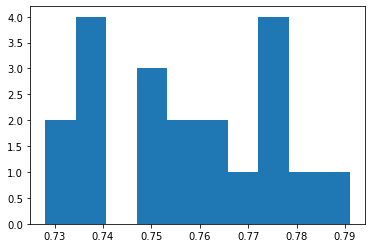

In [127]:
pylab.hist(resultados)

In [128]:
np.mean(resultados)

0.7569065853781427

# Novas Variáveis

modeloanterior = 0.7569065853781427

In [129]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [131]:
variaveis = ['Sex_bin', 'Age', "Pclass", "SibSp", "Parch", "Fare"]

In [132]:
X = train[variaveis].fillna(-1)
y = train["Survived"]

In [153]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)

for linhas_train_train, linhas_valid in kf.split(X):

    print("Treino: ", linhas_train_train.shape[0])
    print("Valid: ", linhas_valid.shape[0])
    print()

    X_train_train, X_valid = X.iloc[linhas_train_train], X.iloc[linhas_valid]
    y_train_train, y_valid = y.iloc[linhas_train_train], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
    modelo.fit(X_train_train, y_train_train)

    p = modelo.predict(X_valid)
    acc = np.mean(y_valid==p)
    resultados.append(acc)
    print("Acc: ", acc)
    print()
    #print(X_train_train.head())
    #print()

Treino:  445
Valid:  446

Acc:  0.773542600896861

Treino:  446
Valid:  445

Acc:  0.8292134831460675

Treino:  445
Valid:  446

Acc:  0.773542600896861

Treino:  446
Valid:  445

Acc:  0.8112359550561797

Treino:  445
Valid:  446

Acc:  0.8071748878923767

Treino:  446
Valid:  445

Acc:  0.7932584269662921

Treino:  445
Valid:  446

Acc:  0.7937219730941704

Treino:  446
Valid:  445

Acc:  0.797752808988764

Treino:  445
Valid:  446

Acc:  0.8228699551569507

Treino:  446
Valid:  445

Acc:  0.8202247191011236

Treino:  445
Valid:  446

Acc:  0.7869955156950673

Treino:  446
Valid:  445

Acc:  0.797752808988764

Treino:  445
Valid:  446

Acc:  0.8318385650224215

Treino:  446
Valid:  445

Acc:  0.8

Treino:  445
Valid:  446

Acc:  0.8228699551569507

Treino:  446
Valid:  445

Acc:  0.7842696629213484

Treino:  445
Valid:  446

Acc:  0.8026905829596412

Treino:  446
Valid:  445

Acc:  0.7910112359550562

Treino:  445
Valid:  446

Acc:  0.8026905829596412

Treino:  446
Valid:  445

Acc: 

(array([2., 2., 2., 2., 3., 3., 1., 0., 3., 2.]),
 array([0.7735426 , 0.7793722 , 0.78520179, 0.79103139, 0.79686099,
        0.80269058, 0.80852018, 0.81434978, 0.82017937, 0.82600897,
        0.83183857]),
 <BarContainer object of 10 artists>)

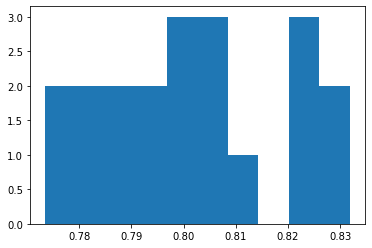

In [154]:
pylab.hist(resultados)

In [155]:
np.mean(resultados)

0.8012339396382325

In [156]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0


In [157]:
X_valid_check.shape

(445, 14)

In [161]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_bin', 'p', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,p,Survived
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,0
15,16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,1,0,1
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


In [162]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [163]:
mulheres.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,p,Survived
415,416,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
362,363,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C,1,1,0
396,397,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
436,437,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
312,313,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S,1,1,0
534,535,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,1,1,0
567,568,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,1,1,0


In [164]:
homens.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,p,Survived
6,7,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,0,1,0
434,435,1,"Silvey, Mr. William Baird",male,50.00,1,0,13507,55.9000,E44,S,0,1,0
505,506,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.00,1,0,PC 17758,108.9000,C65,C,0,1,0
536,537,1,"Butt, Major. Archibald Willingham",male,45.00,0,0,113050,26.5500,B38,S,0,1,0
544,545,1,"Douglas, Mr. Walter Donald",male,50.00,1,0,PC 17761,106.4250,C86,C,0,1,0
574,575,3,"Rush, Mr. Alfred George John",male,16.00,0,0,A/4. 20589,8.0500,NaN,S,0,1,0
583,584,1,"Ross, Mr. John Hugo",male,36.00,0,0,13049,40.1250,A10,C,0,1,0
377,378,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.5000,C82,C,0,1,0
667,668,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S,0,1,0
704,705,3,"Hansen, Mr. Henrik Juul",male,26.00,1,0,350025,7.8542,NaN,S,0,1,0


In [166]:
train["Embarked_S"] = (train["Embarked"] == 'S').astype(int)
train["Embarked_C"] = (train["Embarked"] == 'C').astype(int)
train["Embarked_Q"] = (train["Embarked"] == 'Q').astype(int)

train["Cabine_nula"] = train["Cabin"].isnull().astype(int)

train["Nome_contem_Miss"] = train["Name"].str.contains("Miss").astype(int)
train["Nome_contem_Mrs"] = train["Name"].str.contains("Mrs").astype(int)

train["Nome_contem_Master"] = train["Name"].str.contains("Master").astype(int)
train["Nome_contem_Col"] = train["Name"].str.contains("Col").astype(int)
train["Nome_contem_Major"] = train["Name"].str.contains("Major").astype(int)
train["Nome_contem_Mr"] = train["Name"].str.contains("Mr").astype(int)

In [167]:
variaveis

['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [168]:
variaveis = ['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Cabine_nula', 'Nome_contem_Miss', 'Nome_contem_Mrs',
            'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

X = train[variaveis].fillna(-1)
y = train["Survived"]

In [169]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)

for linhas_train_train, linhas_valid in kf.split(X):

    print("Treino: ", linhas_train_train.shape[0])
    print("Valid: ", linhas_valid.shape[0])
    print()

    X_train_train, X_valid = X.iloc[linhas_train_train], X.iloc[linhas_valid]
    y_train_train, y_valid = y.iloc[linhas_train_train], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
    modelo.fit(X_train_train, y_train_train)

    p = modelo.predict(X_valid)
    acc = np.mean(y_valid==p)
    resultados2.append(acc)
    print("Acc: ", acc)
    print()
    #print(X_train_train.head())
    #print()

Treino:  445
Valid:  446

Acc:  0.7802690582959642

Treino:  446
Valid:  445

Acc:  0.8292134831460675

Treino:  445
Valid:  446

Acc:  0.7914798206278026

Treino:  446
Valid:  445

Acc:  0.8359550561797753

Treino:  445
Valid:  446

Acc:  0.7892376681614349

Treino:  446
Valid:  445

Acc:  0.8112359550561797

Treino:  445
Valid:  446

Acc:  0.7959641255605381

Treino:  446
Valid:  445

Acc:  0.7955056179775281

Treino:  445
Valid:  446

Acc:  0.8026905829596412

Treino:  446
Valid:  445

Acc:  0.8112359550561797

Treino:  445
Valid:  446

Acc:  0.8116591928251121

Treino:  446
Valid:  445

Acc:  0.8044943820224719

Treino:  445
Valid:  446

Acc:  0.8363228699551569

Treino:  446
Valid:  445

Acc:  0.8089887640449438

Treino:  445
Valid:  446

Acc:  0.8183856502242153

Treino:  446
Valid:  445

Acc:  0.7887640449438202

Treino:  445
Valid:  446

Acc:  0.8071748878923767

Treino:  446
Valid:  445

Acc:  0.8134831460674158

Treino:  445
Valid:  446

Acc:  0.8004484304932735

Treino:  446

((array([1., 3., 2., 1., 3., 6., 1., 0., 1., 2.]),
  array([0.78026906, 0.78587444, 0.79147982, 0.7970852 , 0.80269058,
         0.80829596, 0.81390135, 0.81950673, 0.82511211, 0.83071749,
         0.83632287]),
  <BarContainer object of 10 artists>),
 (array([2., 2., 2., 2., 3., 3., 1., 0., 3., 2.]),
  array([0.7735426 , 0.7793722 , 0.78520179, 0.79103139, 0.79686099,
         0.80269058, 0.80852018, 0.81434978, 0.82017937, 0.82600897,
         0.83183857]),
  <BarContainer object of 10 artists>))

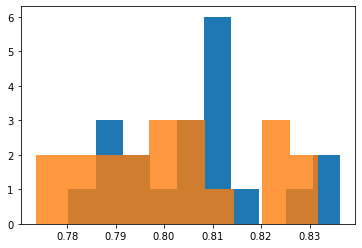

In [171]:
pylab.hist(resultados2), pylab.hist(resultados, alpha=.8)

In [172]:
np.mean(resultados2), np.mean(resultados)

(0.807074872776742, 0.8012339396382325)

# Regressão Logistica

In [195]:
from sklearn.linear_model import LogisticRegression

In [196]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)

for linhas_train_train, linhas_valid in kf.split(X):

    print("Treino: ", linhas_train_train.shape[0])
    print("Valid: ", linhas_valid.shape[0])
    print()

    X_train_train, X_valid = X.iloc[linhas_train_train], X.iloc[linhas_valid]
    y_train_train, y_valid = y.iloc[linhas_train_train], y.iloc[linhas_valid]

    modelo = LogisticRegression()
    modelo.fit(X_train_train, y_train_train)

    p = modelo.predict(X_valid)
    acc = np.mean(y_valid==p)
    resultados.append(acc)
    print("Acc: ", acc)
    print()
    #print(X_train_train.head())
    #print()

Treino:  445
Valid:  446

Acc:  0.8004484304932735

Treino:  446
Valid:  445

Acc:  0.8404494382022472

Treino:  445
Valid:  446

Acc:  0.7937219730941704

Treino:  446
Valid:  445



C:\Users\epile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\epile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acc:  0.8404494382022472

Treino:  445
Valid:  446

Acc:  0.7982062780269058

Treino:  446
Valid:  445

Acc:  0.8224719101123595

Treino:  445
Valid:  446

Acc:  0.8116591928251121

Treino:  446
Valid:  445



C:\Users\epile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\epile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acc:  0.8224719101123595

Treino:  445
Valid:  446

Acc:  0.8116591928251121

Treino:  446
Valid:  445

Acc:  0.8292134831460675

Treino:  445
Valid:  446

Acc:  0.8161434977578476

Treino:  446
Valid:  445

Acc:  0.8404494382022472

Treino:  445
Valid:  446



C:\Users\epile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\epile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acc:  0.8183856502242153

Treino:  446
Valid:  445

Acc:  0.8134831460674158

Treino:  445
Valid:  446

Acc:  0.8318385650224215

Treino:  446
Valid:  445

Acc:  0.8157303370786517

Treino:  445
Valid:  446

Acc:  0.8340807174887892

Treino:  446
Valid:  445

Acc:  0.8179775280898877

Treino:  445
Valid:  446

Acc:  0.8161434977578476

Treino:  446
Valid:  445

Acc:  0.8134831460674158



C:\Users\epile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\epile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

((array([2., 1., 0., 2., 5., 2., 2., 1., 2., 3.]),
  array([0.79372197, 0.79839472, 0.80306747, 0.80774021, 0.81241296,
         0.81708571, 0.82175845, 0.8264312 , 0.83110395, 0.83577669,
         0.84044944]),
  <BarContainer object of 10 artists>),
 (array([1., 3., 2., 1., 3., 6., 1., 0., 1., 2.]),
  array([0.78026906, 0.78587444, 0.79147982, 0.7970852 , 0.80269058,
         0.80829596, 0.81390135, 0.81950673, 0.82511211, 0.83071749,
         0.83632287]),
  <BarContainer object of 10 artists>))

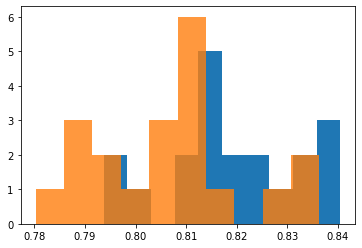

In [199]:
pylab.hist(resultados), pylab.hist(resultados2, alpha=.8)

In [198]:
np.mean(resultados)

0.8194233385398297

# LGBM

In [206]:
import lightgbm

In [ ]:
lgbr = lightgbm.LGBMRegressor(objective='binary')
lgbr.fit(X_train, y_train)
lgbr_pred = lgbr.predict(X_test)

In [208]:
test["Embarked_S"] = (test["Embarked"] == 'S').astype(int)
test["Embarked_C"] = (test["Embarked"] == 'C').astype(int)
test["Embarked_Q"] = (test["Embarked"] == 'Q').astype(int)

test["Cabine_nula"] = test["Cabin"].isnull().astype(int)

test["Nome_contem_Miss"] = test["Name"].str.contains("Miss").astype(int)
test["Nome_contem_Mrs"] = test["Name"].str.contains("Mrs").astype(int)

test["Nome_contem_Master"] = test["Name"].str.contains("Master").astype(int)
test["Nome_contem_Col"] = test["Name"].str.contains("Col").astype(int)
test["Nome_contem_Major"] = test["Name"].str.contains("Major").astype(int)
test["Nome_contem_Mr"] = test["Name"].str.contains("Mr").astype(int)

variaveis = ['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Cabine_nula', 'Nome_contem_Miss', 'Nome_contem_Mrs',
            'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

#modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
modelo = lightgbm.LGBMRegressor(objective='binary')
modelo.fit(X,y)

p = modelo.predict(test[variaveis].fillna(-1))

Criar submission

In [209]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [210]:
sub.to_csv("modelo_LGBM.csv", header=True)

# Retreinar o modelo

In [181]:
X.head()

,Sex_bin,Age,Pclass,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr
0,0,22.0,3,1,0,7.2500,1,0,0,1,0,0,0,0,0,1
1,1,38.0,1,1,0,71.2833,0,1,0,0,0,1,0,0,0,1
2,1,26.0,3,0,0,7.9250,1,0,0,1,1,0,0,0,0,0
3,1,35.0,1,1,0,53.1000,1,0,0,0,0,1,0,0,0,1
4,0,35.0,3,0,0,8.0500,1,0,0,1,0,0,0,0,0,1


In [182]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [183]:
test[variaveis].head()

KeyError: "['Embarked_S', 'Embarked_C', 'Embarked_Q', 'Cabine_nula', 'Nome_contem_Miss', 'Nome_contem_Mrs', 'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr'] not in index"

In [200]:
test["Embarked_S"] = (test["Embarked"] == 'S').astype(int)
test["Embarked_C"] = (test["Embarked"] == 'C').astype(int)
test["Embarked_Q"] = (test["Embarked"] == 'Q').astype(int)

test["Cabine_nula"] = test["Cabin"].isnull().astype(int)

test["Nome_contem_Miss"] = test["Name"].str.contains("Miss").astype(int)
test["Nome_contem_Mrs"] = test["Name"].str.contains("Mrs").astype(int)

test["Nome_contem_Master"] = test["Name"].str.contains("Master").astype(int)
test["Nome_contem_Col"] = test["Name"].str.contains("Col").astype(int)
test["Nome_contem_Major"] = test["Name"].str.contains("Major").astype(int)
test["Nome_contem_Mr"] = test["Name"].str.contains("Mr").astype(int)

variaveis = ['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Cabine_nula', 'Nome_contem_Miss', 'Nome_contem_Mrs',
            'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

#modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
modelo = LogisticRegression()
modelo.fit(X,y)

p = modelo.predict(test[variaveis].fillna(-1))

C:\Users\epile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
p

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Criar Submission

In [202]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [203]:
sub.to_csv("modelo_LR.csv", header=True)

In [193]:
print(sub)

PassengerId
892     0
893     0
894     0
895     1
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64
